In [7]:
import pandas as pd

In [29]:
df1 = pd.read_csv("dataframeB005.csv")
df2 = pd.read_csv("dataframeB007.csv")

In [12]:
df1.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.0
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.0
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.0
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.0
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.0


In [11]:
df2.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
0,1,24,2008-04-02 15:25:41,1.891052,4.199360,-0.001866,23.937044,-0.0004,0.000,0.000,1.0
1,1,24,2008-04-02 15:25:41,1.891052,4.199497,-0.002139,23.924074,-0.0004,4.215,16.781,1.0
2,1,24,2008-04-02 15:25:41,1.891052,3.985606,-1.988778,24.004257,-2.0000,3.003,35.703,1.0
3,1,24,2008-04-02 15:25:41,1.891052,3.963247,-1.992558,24.162868,-2.0000,2.987,53.781,1.0
4,1,24,2008-04-02 15:25:41,1.891052,3.946647,-1.988491,24.346368,-2.0000,2.972,71.922,1.0


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df1['datetime'] = pd.to_datetime(df['datetime'])
df1.drop('datetime', axis=1, inplace=True)

In [17]:
df2.drop('datetime', axis = 1, inplace = True)

In [18]:
df1.drop('capacity', axis = 1, inplace = True)
df2.drop('capacity', axis = 1, inplace = True)

In [20]:
df1.head()

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
0,1,24,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.0
1,1,24,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.0
2,1,24,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.0
3,1,24,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.0
4,1,24,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.0


In [21]:
df2.head()

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
0,1,24,4.199360,-0.001866,23.937044,-0.0004,0.000,0.000,1.0
1,1,24,4.199497,-0.002139,23.924074,-0.0004,4.215,16.781,1.0
2,1,24,3.985606,-1.988778,24.004257,-2.0000,3.003,35.703,1.0
3,1,24,3.963247,-1.992558,24.162868,-2.0000,2.987,53.781,1.0
4,1,24,3.946647,-1.988491,24.346368,-2.0000,2.972,71.922,1.0


In [22]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
28431,98,24,1.501545,3.786911,-2.012022,27.947185,1.9982,2.805,347.438
18899,69,24,1.632735,3.677309,-2.012995,29.845107,1.9982,2.699,787.703
7204,35,24,1.804610,3.688518,-2.013343,29.356817,1.9982,2.726,909.797
47419,159,24,1.303033,3.483056,-2.015500,31.804777,1.9980,2.502,1078.219
34697,117,24,1.412409,3.055772,-2.013661,39.143824,1.9982,2.095,2408.547
...,...,...,...,...,...,...,...,...,...
11284,47,24,1.736091,3.695960,-2.012909,29.051871,1.9982,2.733,806.391
44732,150,24,1.323872,3.431512,-2.014189,33.106612,1.9982,2.470,1350.031
38158,128,24,1.380437,3.509478,0.000239,37.559211,0.0008,0.000,2705.890
860,5,24,1.834646,3.593174,-2.014066,31.715115,-1.9982,2.657,1425.109


In [10]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "Extra Trees": ExtraTreesRegressor(random_state=42, n_estimators=100)
}

In [11]:
# Train and evaluate each model
performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.4f}, R²: {r2:.4f}")

Decision Tree - MSE: 0.0000, R²: 1.0000
Random Forest - MSE: 0.0000, R²: 1.0000
Gradient Boosting - MSE: 0.0000, R²: 1.0000
Extra Trees - MSE: 0.0000, R²: 1.0000


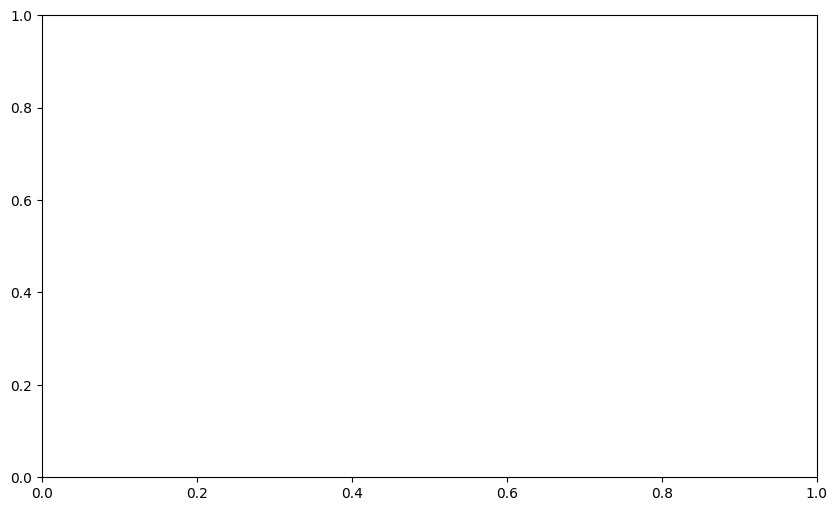

In [12]:
# Plot performance
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
mse_values = [performance[model]["MSE"] for model in models]
r2_values = [performance[model]["R2"] for model in models]

In [13]:
# Bar plots for MSE and R²
bar_width = 0.35
ax.bar(x - bar_width/2, mse_values, bar_width, label='MSE')
ax.bar(x + bar_width/2, r2_values, bar_width, label='R²')

<BarContainer object of 4 artists>

In [14]:
ax.set_xticks(x)
ax.set_xticklabels(models.keys())
ax.set_ylabel('Score')
ax.set_title('Model Performance (Tree-Based Models)')
ax.legend()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Linear Regression Performance:
Mean Squared Error (MSE): 0.0002
R² Score: 0.9768


/var/folders/1r/7wp505r565s8_5rgnvmv3xxw0000gn/T/ipykernel_910/76083089.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


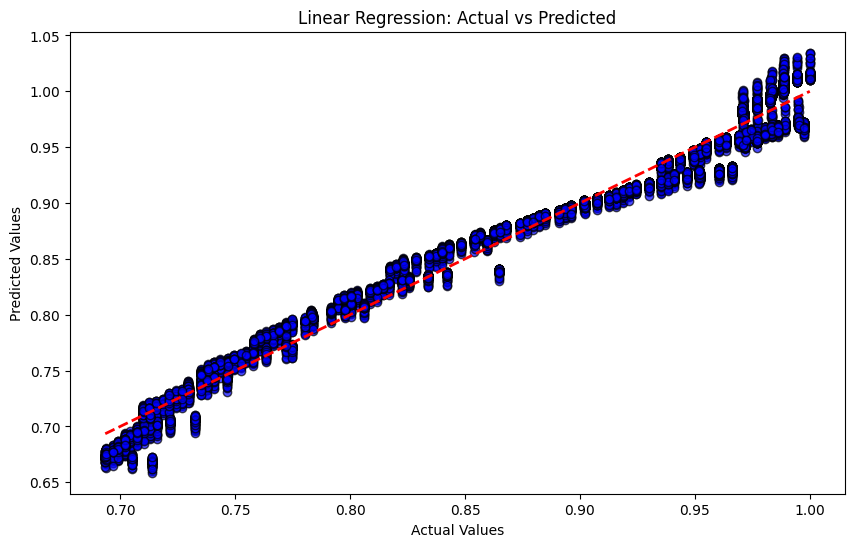

In [24]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()


lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [37]:
x_try = [126,24,3.7907011252127667,-1.9884286137688756,27.63395726059095,2.0,2.855,347.61]

In [41]:
x_try_2= [1,24,1.89105229539079,4.199359521791473,-0.0018658918833680202,23.93704394613529,-0.0004,0.0,0.0]

In [36]:
x_try2 = [2,24,1.880637027686859,3.534003040754616,-1.988822740822399,33.07677028304949,-2.0,2.602,1871.657]

In [46]:
x_try3 = [168,24,1.4324552720625434,3.292548602818005,-1.9885524842924716,36.60138738914052,2.0,2.354,2250.484,0.7574910940083355]

In [38]:

x_try3 = np.array(x_try).reshape(1, -1)

In [39]:
y_pred2 = lr_model.predict(x_try3)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
print(y_pred2)

[0.76118787]


In [4]:
file_path = "dis_ele_per_cycle.csv"  # Update with your file path
df = pd.read_csv(file_path)


In [5]:
df.head()

,cycle,datetime,capacity,SoH
0,1,2008-04-02 15:25:41,1.891052,1.000000
1,2,2008-04-02 19:43:48,1.880637,0.994492
2,3,2008-04-03 00:01:06,1.880663,0.994506
3,4,2008-04-03 04:16:37,1.880771,0.994563
4,5,2008-04-03 08:33:25,1.879451,0.993865
